In [9]:
require(ggplot2)

In [10]:
dose=c(10.2,7.7,5.1,3.8,2.6,0)
m=c(50,49,46,48,50,49)
y=c(44,42,24,16,6,0)
p=y/m

In [11]:
dados=cbind.data.frame(dose,m,y,p)
dados

dose,m,y,p
<dbl>,<dbl>,<dbl>,<dbl>
10.2,50,44,0.8800000
7.7,49,42,0.8571429
5.1,46,24,0.5217391
3.8,48,16,0.3333333
2.6,50,6,0.1200000
0.0,49,0,0.0000000


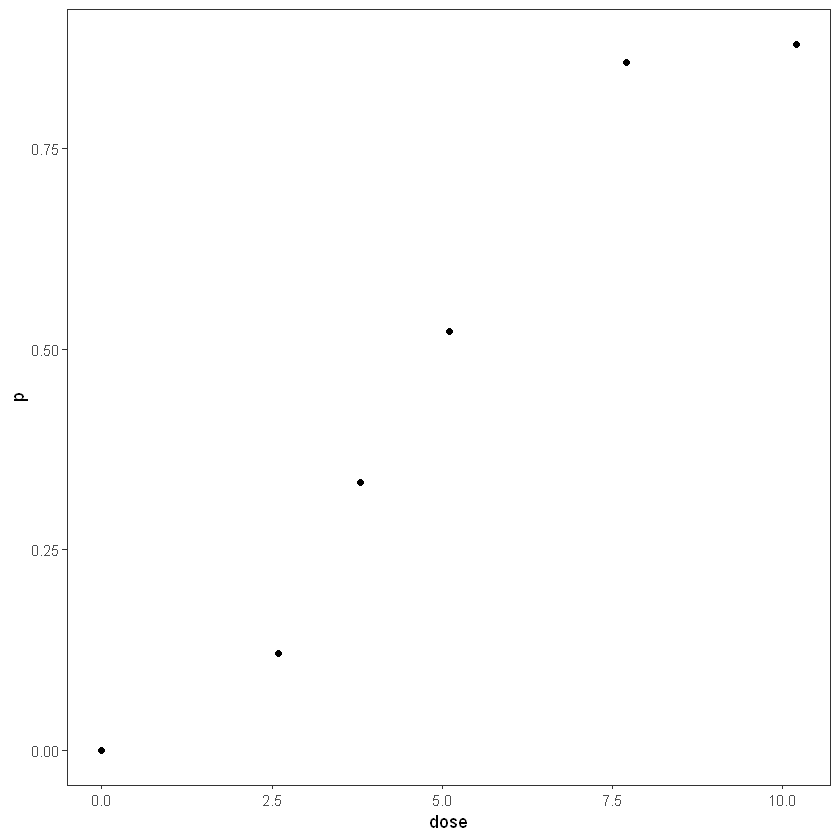

In [12]:
ggplot(dados)+aes(dose,p)+geom_point()+theme_test()

In [13]:
resp=cbind(y,m-y)
colnames(resp)=c("Sucessos","Fracassos")
resp

Sucessos,Fracassos
44,6
42,7
24,22
16,32
6,44
0,49


In [14]:
modelo1=glm(resp~dose,family= binomial)

In [15]:
summary(modelo1)


Call:
glm(formula = resp ~ dose, family = binomial)

Deviance Residuals: 
      1        2        3        4        5        6  
-1.9456   0.9145   0.7679   0.7507  -0.8157  -1.9540  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.22566    0.36992  -8.720   <2e-16 ***
dose         0.60513    0.06781   8.923   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 163.745  on 5  degrees of freedom
Residual deviance:  10.258  on 4  degrees of freedom
AIC: 33.479

Number of Fisher Scoring iterations: 5


In [16]:
modelo1$coefficients

(Intercept)        dose 
 -3.2256633   0.6051256

In [17]:
modelo1$fitted.values

1          2          3          4          5          6 
0.95010337 0.80749325 0.46517573 0.28369909 0.16079337 0.03821131

In [18]:
modelo1$fitted.values*m

1         2         3         4         5         6 
47.505169 39.567169 21.398084 13.617556  8.039668  1.872354

In [19]:
modelo1$linear.predictors

1          2          3          4          5          6 
 2.9466174  1.4338035 -0.1395230 -0.9261862 -1.6523369 -3.2256633

In [20]:
modelo1$residuals

1          2          3          4          5          6 
-1.4787571  0.3193971  0.2273565  0.2442463 -0.3023100 -1.0397294

In [21]:
cbind(p,modelo1$fitted.values)

,p,
1,0.8800000,0.95010337
2,0.8571429,0.80749325
3,0.5217391,0.46517573
4,0.3333333,0.28369909
5,0.1200000,0.16079337
6,0.0000000,0.03821131


`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


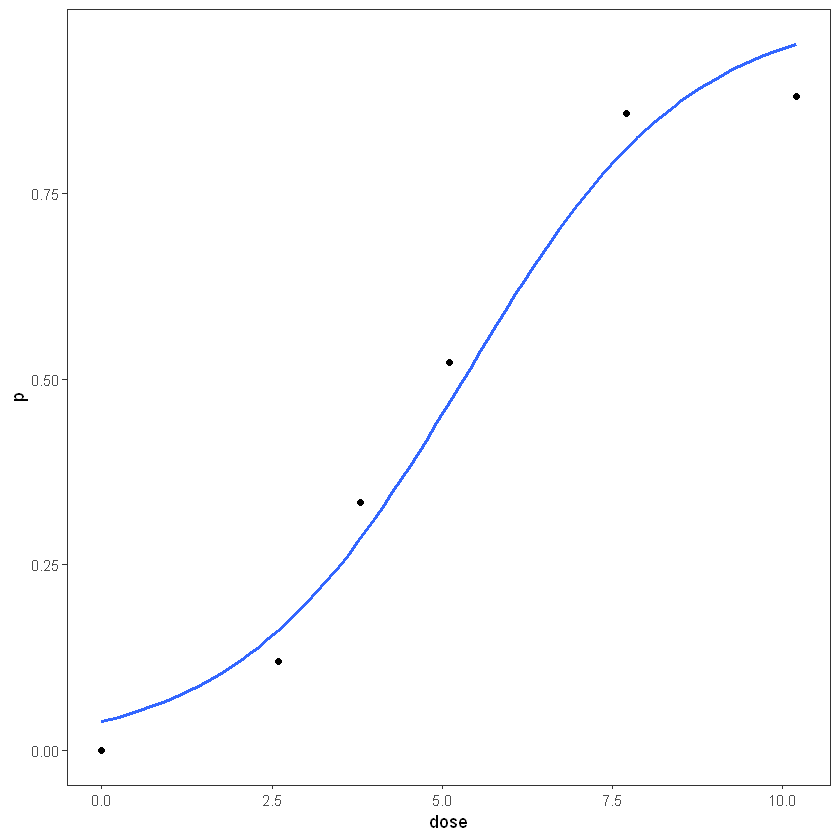

In [22]:
ggplot(dados)+aes(dose,p)+geom_point()+geom_smooth(method=glm, method.args = list(family = binomial(link="logit")),se=F)+theme_test()

In [25]:
modelo2=glm(resp~dose,family= binomial(link="probit"))

In [26]:
summary(modelo2)


Call:
glm(formula = resp ~ dose, family = binomial(link = "probit"))

Deviance Residuals: 
      1        2        3        4        5        6  
-1.9488   1.3194   0.9202   0.7128  -0.8693  -1.7338  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.87775    0.19485  -9.637   <2e-16 ***
dose         0.34553    0.03436  10.055   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 163.745  on 5  degrees of freedom
Residual deviance:  10.655  on 4  degrees of freedom
AIC: 33.876

Number of Fisher Scoring iterations: 5


In [ ]:
cbind(p, modelo2$fitted.values)

`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


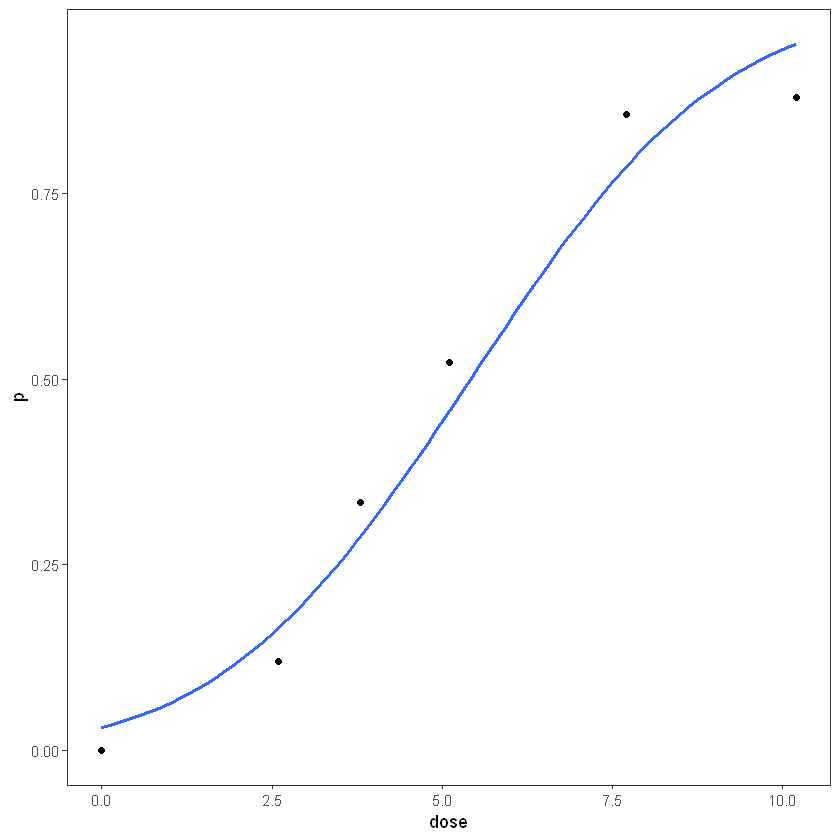

In [33]:
ggplot(dados)+aes(dose,p)+geom_point()+geom_smooth(method=glm, method.args = list(family = binomial(link="probit")),se=F)+theme_test()

In [35]:
modelo3=glm(resp~dose,family= binomial(link="cloglog"))

In [36]:
summary(modelo3)


Call:
glm(formula = resp ~ dose, family = binomial(link = "cloglog"))

Deviance Residuals: 
     1       2       3       4       5       6  
-2.074   2.198   1.522   0.710  -1.500  -2.986  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.39735    0.24515  -9.779   <2e-16 ***
dose         0.34488    0.03481   9.908   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 163.745  on 5  degrees of freedom
Residual deviance:  23.119  on 4  degrees of freedom
AIC: 46.339

Number of Fisher Scoring iterations: 7


In [42]:
cbind(p,modelo3$fitted.values)

,p,
1,0.8800000,0.95340630
2,0.8571429,0.72601274
3,0.5217391,0.41028503
4,0.3333333,0.28630388
5,0.1200000,0.19987345
6,0.0000000,0.08694479


`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


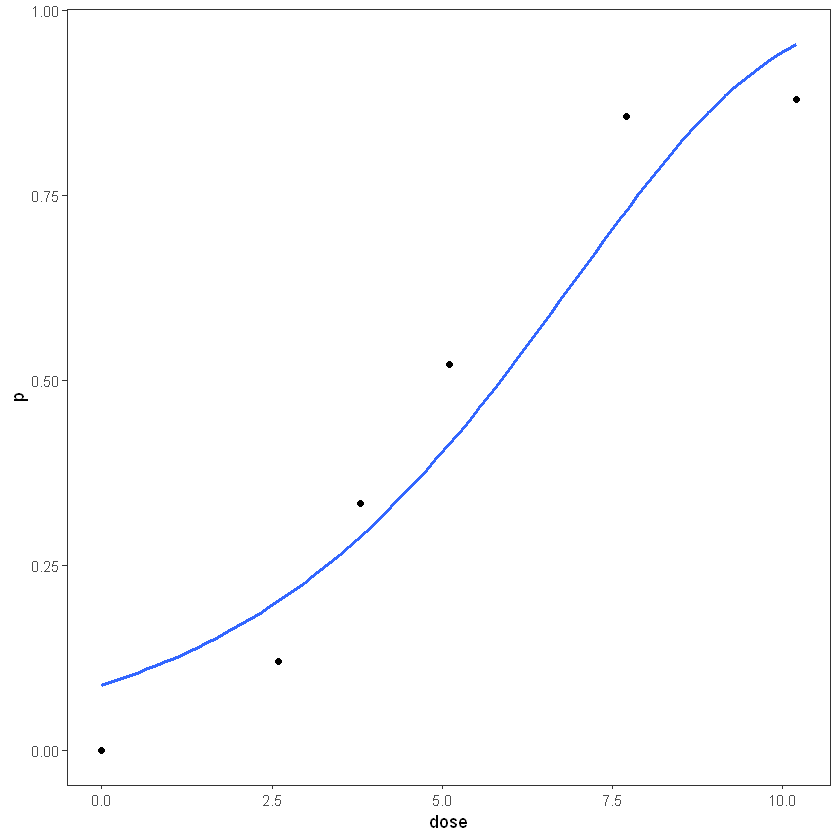

In [43]:
ggplot(dados)+aes(dose,p)+geom_point()+geom_smooth(method=glm, method.args = list(family = binomial(link="cloglog")),se=F)+theme_test()

In [45]:
require(MASS)

Loading required package: MASS



In [46]:
x=rbind(dose.p(modelo1,cf=1:2,p=0.5),dose.p(modelo2,cf=1:2,p=0.5),dose.p(modelo3,cf=1:2,p=0.5))
rownames(x)=c("Modelo Binomial-Logit","Modelo Binomial-Probit","Modelo Binomial-cloglog")
x

,p = 0.5:
Modelo Binomial-Logit,5.330569
Modelo Binomial-Probit,5.434366
Modelo Binomial-cloglog,5.888458


In [47]:
x=rbind(dose.p(modelo1,cf=1:2,p=0.9),dose.p(modelo2,cf=1:2,p=0.9),dose.p(modelo3,cf=1:2,p=0.9))
rownames(x)=c("Modelo Binomial-Logit","Modelo Binomial-Probit","Modelo Binomial-cloglog")
x

,p = 0.9:
Modelo Binomial-Logit,8.961591
Modelo Binomial-Probit,9.143277
Modelo Binomial-cloglog,9.369471


`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


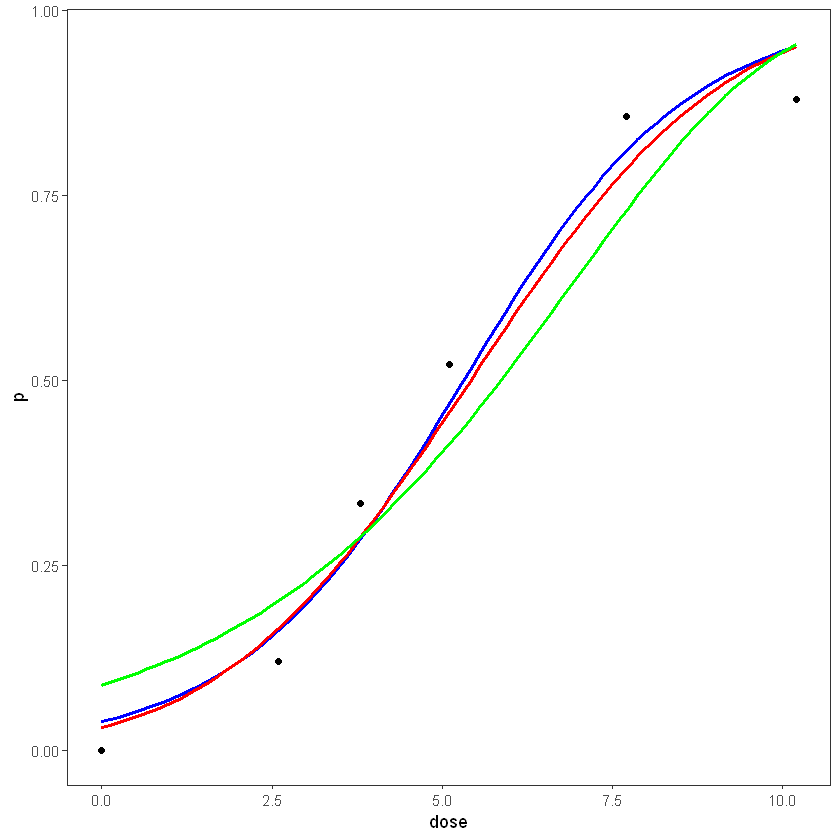

In [48]:
#Gráficos dos glms
(ggplot(dados)+aes(dose,p)+geom_point()
  +geom_smooth(color="blue",method=glm, method.args = list(family = binomial),se=F)
  +geom_smooth(color="red",method=glm, method.args = list(family = binomial(link=probit)),se=F)+
  geom_smooth(color="green",method=glm, method.args = list(family = binomial(link=cloglog)),se=F)+theme_test())